<a href="https://colab.research.google.com/github/TaeWoongYoun/dataAnalysis/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'A': [1, 2, np.nan, 4, 5],
	        'B': [6, 7, 8, np.nan, 10],
	        'C': [11, 12, 13, np.nan, np.nan]})
df

,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0
2,NaN,8.0,13.0
3,4.0,NaN,NaN
4,5.0,10.0,NaN


In [ ]:
pd.isna((df)).sum()

,0
A,1
B,1
C,2


In [ ]:
df_drop_nan = df.dropna()
df_drop_nan

,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0


In [ ]:
df_0 = df['C'].fillna(0)
print(df_0)


0    11.0
1    12.0
2    13.0
3     0.0
4     0.0
Name: C, dtype: float64


In [ ]:
df_missing = df['A'].fillna('missing')
df_missing

,A
0,1.0
1,2.0
2,missing
3,4.0
4,5.0


In [ ]:
print(df, '\n')
#결측치 바로 위의 값으로 대체하기
df_ffill = df.fillna(method='ffill')
print(df_ffill, '\n')
#결측치 바로 아래의 값으로 대체하기
df_bfill = df.fillna(method='bfill')
print(df_bfill)


     A     B     C
0  1.0   6.0  11.0
1  2.0   7.0  12.0
2  NaN   8.0  13.0
3  4.0   NaN   NaN
4  5.0  10.0   NaN 

     A     B     C
0  1.0   6.0  11.0
1  2.0   7.0  12.0
2  2.0   8.0  13.0
3  4.0   8.0  13.0
4  5.0  10.0  13.0 

     A     B     C
0  1.0   6.0  11.0
1  2.0   7.0  12.0
2  4.0   8.0  13.0
3  4.0  10.0   NaN
4  5.0  10.0   NaN


<ipython-input-9-3eeeadf0e473>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')
<ipython-input-9-3eeeadf0e473>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfill')


In [ ]:
fill_dict = {'A': df['A'].mean( ), 'B': '12/25', 'C': 'missing'}
df_filled = df.fillna(value=fill_dict)
df_filled


,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0
2,3.0,8.0,13.0
3,4.0,12/25,missing
4,5.0,10.0,missing


In [ ]:
import matplotlib.pyplot as plt

scores = [85, 87, 90, 88, 86, 89, 91, 10]

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46308 (\N{HANGUL SYLLABLE DEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

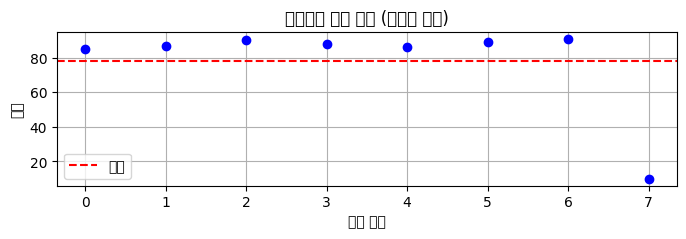

In [ ]:
# 2. 데이터 시각화 (점으로 보기)
plt.figure(figsize=(8, 2))
plt.plot(scores, 'o', color='blue')  # 파란 점으로 나타내기
plt.title('학생들의 시험 점수 (이상치 포함)')
plt.xlabel('학생 번호')
plt.ylabel('점수')
plt.axhline(y=sum(scores)/len(scores), color='red', linestyle='--', label='평균')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# 1. 데이터 준비
scores = [85, 87, 90, 88, 86, 89, 91, 10]  # 10은 이상치
df = pd.DataFrame({'점수': scores})

# 2. IQR 계산하기
Q1 = df['점수'].quantile(0.25)  # 1사분위수
Q3 = df['점수'].quantile(0.75)  # 3사분위수
IQR = Q3 - Q1

# 3. 이상치 경계값 구하기
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 4. 이상치 제거
df_clean = df[(df['점수'] >= lower_bound) & (df['점수'] <= upper_bound)]

# 5. 결과 출력
print("원래 데이터:")
print(df)

print("\n이상치 제거 후 데이터:")
print(df_clean)

원래 데이터:
   점수
0  85
1  87
2  90
3  88
4  86
5  89
6  91
7  10

이상치 제거 후 데이터:
   점수
0  85
1  87
2  90
3  88
4  86
5  89
6  91


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 원본 데이터 (키, 몸무게)
data = np.array([
    [170, 70],
    [160, 50],
    [180, 80]
])

# 표준화
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

# 반올림
rounded_data = np.round(standardized_data, 0)

print("원본 데이터:")
print(data)
print("\n표준화된 데이터:")
print(rounded_data)

원본 데이터:
[[170  70]
 [160  50]
 [180  80]]

표준화된 데이터:
[[ 0.  0.]
 [-1. -1.]
 [ 1.  1.]]


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from datetime import datetime, date, time

warnings.filterwarnings('ignore')


In [ ]:
path = './대전태평(암반)/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.xlsx')]
file_list_py = sorted(file_list_py)
file_list_py

['대전태평(암반)_2009_hr.xlsx',
 '대전태평(암반)_2010_hr.xlsx',
 '대전태평(암반)_2011_hr.xlsx',
 '대전태평(암반)_2012_hr.xlsx',
 '대전태평(암반)_2013_hr.xlsx',
 '대전태평(암반)_2014_hr.xlsx',
 '대전태평(암반)_2015_hr.xlsx',
 '대전태평(암반)_2016_hr.xlsx']

In [ ]:
df = pd.DataFrame()
for i in file_list_py:
   data = pd.read_excel(path + i)
   df = pd.concat([df, data])
df


,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
0,대전태평,(암반),20090101,0,16.1,44.47,749
1,대전태평,(암반),20090101,1,16.1,44.47,749
2,대전태평,(암반),20090101,2,16.1,44.47,749
3,대전태평,(암반),20090101,3,16.1,44.47,749
4,대전태평,(암반),20090101,4,16.1,44.47,749
...,...,...,...,...,...,...,...
8761,대전태평,(암반),20161231,19,16.2,44.49,725
8762,대전태평,(암반),20161231,20,16.2,44.49,725
8763,대전태평,(암반),20161231,21,16.2,44.49,725
8764,대전태평,(암반),20161231,22,16.2,44.49,725


In [ ]:
df = df.reset_index(drop=True)
df

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
0,대전태평,(암반),20090101,0,16.1,44.47,749
1,대전태평,(암반),20090101,1,16.1,44.47,749
2,대전태평,(암반),20090101,2,16.1,44.47,749
3,대전태평,(암반),20090101,3,16.1,44.47,749
4,대전태평,(암반),20090101,4,16.1,44.47,749
...,...,...,...,...,...,...,...
69543,대전태평,(암반),20161231,19,16.2,44.49,725
69544,대전태평,(암반),20161231,20,16.2,44.49,725
69545,대전태평,(암반),20161231,21,16.2,44.49,725
69546,대전태평,(암반),20161231,22,16.2,44.49,725


In [ ]:
df['Date'] = pd.to_datetime(df['날짜'],format='%Y%m%d') +\
 	pd.to_timedelta(df['시간'].astype(int),unit='h')

df.set_index(df['Date'], inplace=True)
df.head(3)

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝),Date
Date,,,,,,,,
2009-01-01 00:00:00,대전태평,(암반),20090101,0,16.1,44.47,749,2009-01-01 00:00:00
2009-01-01 01:00:00,대전태평,(암반),20090101,1,16.1,44.47,749,2009-01-01 01:00:00
2009-01-01 02:00:00,대전태평,(암반),20090101,2,16.1,44.47,749,2009-01-01 02:00:00


In [ ]:
df1 = df[['수온(℃)', '수위(el.m)','EC(㎲/㎝)']]
df1.columns = ['temp', 'level', 'EC']
df1.head(3)

,temp,level,EC
Date,,,
2009-01-01 00:00:00,16.1,44.47,749
2009-01-01 01:00:00,16.1,44.47,749
2009-01-01 02:00:00,16.1,44.47,749


In [ ]:
df1.isnull().sum()

,0
temp,0
level,0
EC,0


In [ ]:
df1.to_csv('./대전지하수.csv', encoding='cp949')


In [ ]:
df = pd.read_csv('./대전지하수.csv', index_col='Date', parse_dates=True, encoding='cp949')
df.describe()


,temp,level,EC
count,69548.000000,69548.000000,69548.000000
mean,16.262491,44.295353,727.024027
std,0.089778,2.539464,51.544590
min,15.800000,11.530000,13.000000
25%,16.200000,44.370000,722.000000
50%,16.300000,44.460000,730.000000
75%,16.300000,44.550000,742.000000
max,16.500000,45.900000,778.000000


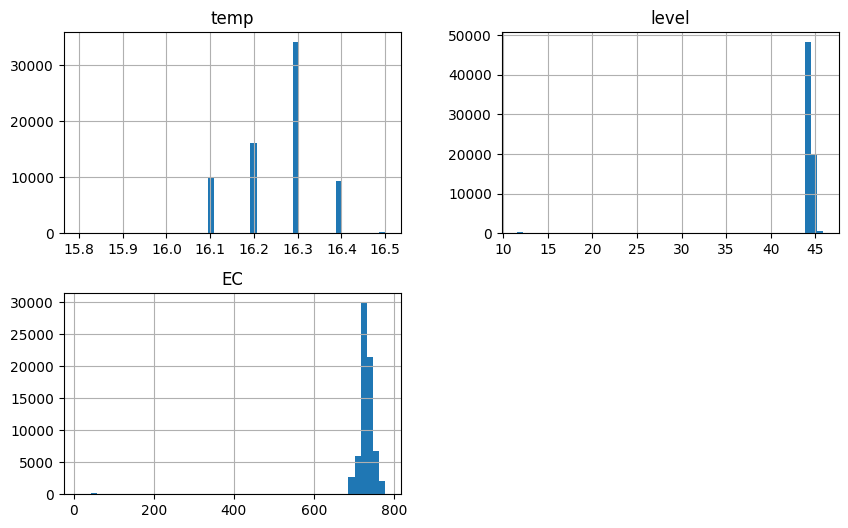

In [ ]:
df.hist(bins=50, figsize=(10,6))
plt.show()


<Axes: >

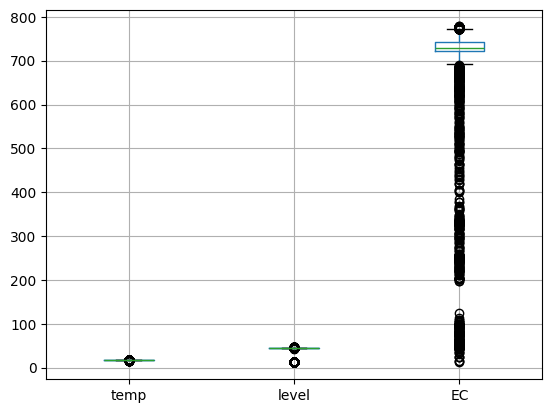

In [ ]:
df.boxplot()

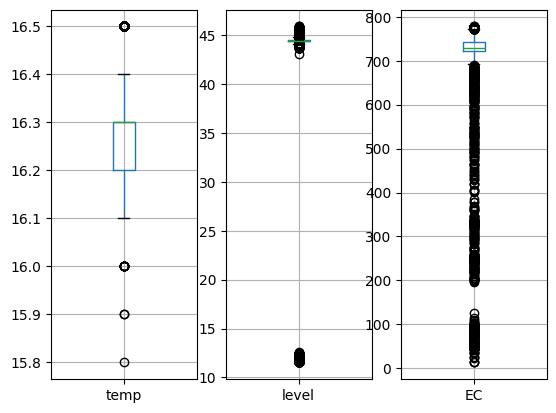

In [ ]:
plt.subplot(1, 3, 1)
df.boxplot(column='temp', return_type='both')
plt.subplot(1, 3, 2)
df.boxplot(column='level', return_type='both')
plt.subplot(1, 3, 3)
df.boxplot(column='EC', return_type='both')
plt.show( )


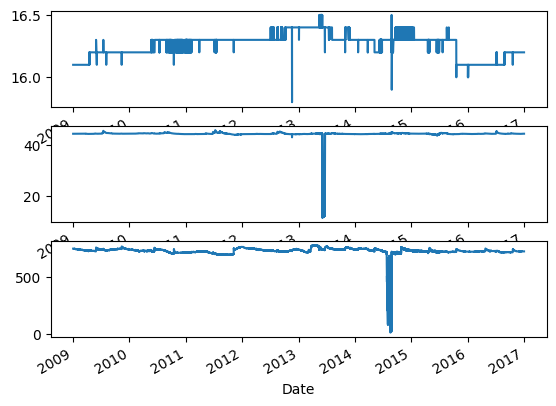

In [ ]:
plt.subplot(3, 1, 1)
df['temp'].plot( )
plt.subplot(3, 1, 2)
df['level'].plot()
plt.subplot(3, 1, 3)
df['EC'].plot( )
plt.show( )

In [ ]:
q3_level = df['level'].quantile(q=0.75)
q1_level = df['level'].quantile(q=0.25)
iqr_level = q3_level - q1_level
print(iqr_level)


0.17999999999999972


In [ ]:
upper_level = q3_level + 1.5 * iqr_level
lower_level = q1_level - 1.5 * iqr_level
print(upper_level, '/', lower_level)
print((df['level'] > upper_level).sum( ))
print((df['level'] < lower_level).sum( ))


44.81999999999999 / 44.099999999999994
4492
1273


<Axes: xlabel='Date'>

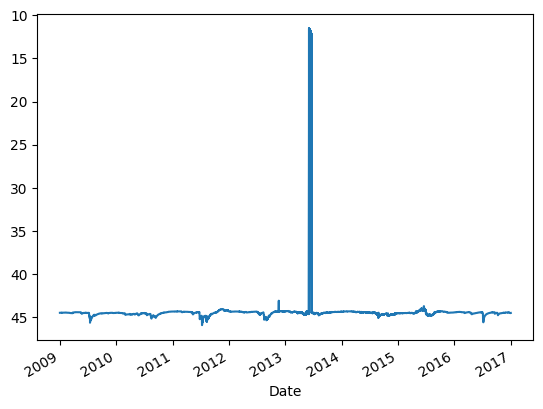

In [ ]:
df_iqr_level = df[(df['level'] < upper_level) & (df['level'] > lower_level)]
df_iqr_level['level'].plot( )

In [ ]:
#사분위수와 IQR 구하기
q3_temp = df['temp'].quantile(q=0.75)
q1_temp = df['temp'].quantile(q=0.25)
iqr_temp = q3_temp-q1_temp
print('IQR:', iqr_temp)
#지하수온 상한값, 하한값, 이상치 개수 구하기
upper_temp = q3_temp + iqr_temp * 1.5
lower_temp = q1_temp - iqr_temp * 1.5
print(upper_temp, '/', lower_temp)
print((df['temp'] > upper_temp).sum( ))
print((df['temp'] < lower_temp).sum( ))

IQR: 0.10000000000000142
16.450000000000003 / 16.049999999999997
227
15


In [ ]:
#사분위수와 IQR 구하기
q3_ec = df['EC'].quantile(q=0.75)
q1_ec = df['EC'].quantile(q=0.25)
iqr_ec = q3_ec - q1_ec
print('IQR:', iqr_ec)
#지하수온 상한값, 하한값, 이상치 개수 구하기
upper_ec = q3_ec + iqr_ec * 1.5
lower_ec = q1_ec - iqr_ec * 1.5
print(upper_ec, '/', lower_ec)
print((df['EC'] > upper_ec).sum( ))
print((df['EC'] < lower_ec).sum( ))


IQR: 20.0
772.0 / 692.0
831
788


In [ ]:
df_iqr = df[(df['temp'] < upper_temp) & (df['temp'] > lower_temp) &\
(df['level'] < upper_level) & (df['level'] > lower_level) &\
(df['EC'] < upper_ec) & (df['EC'] > lower_ec)]


In [ ]:
df_iqr.describe( )


,temp,level,EC
count,61814.000000,61814.000000,61814.000000
mean,16.256793,44.459701,731.698612
std,0.089692,0.128256,13.882905
min,16.100000,44.100000,693.000000
25%,16.200000,44.370000,722.000000
50%,16.300000,44.450000,730.000000
75%,16.300000,44.520000,742.000000
max,16.400000,44.810000,771.000000


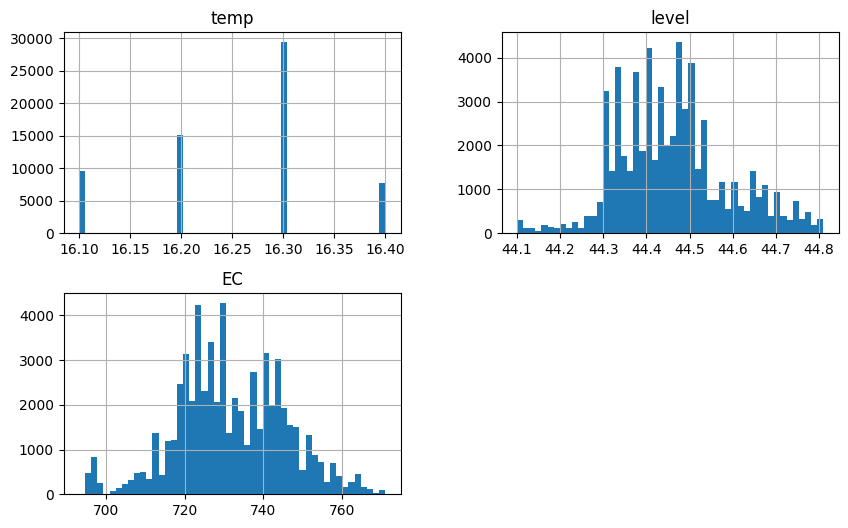

In [ ]:
df_iqr.hist(bins=50, figsize=(10,6))
plt.show( )


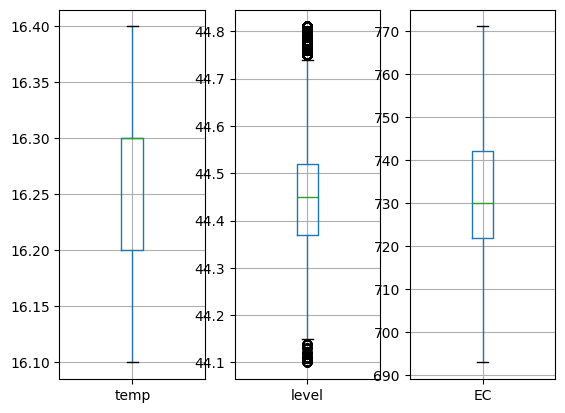

In [ ]:
plt.subplot(1, 3, 1)
df_iqr.boxplot(column='temp', return_type='both')
plt.subplot(1, 3, 2)
df_iqr.boxplot(column='level', return_type='both')
plt.subplot(1, 3, 3)
df_iqr.boxplot(column='EC', return_type='both')
plt.show( )


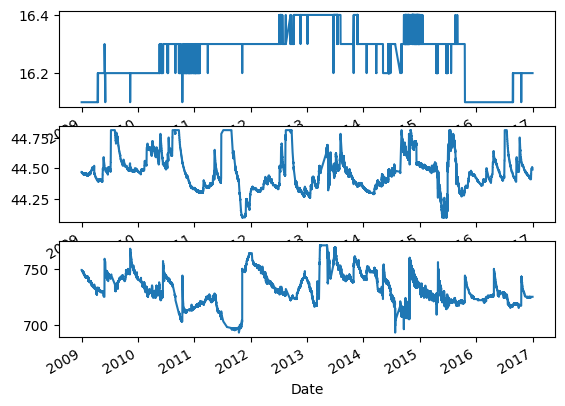

In [ ]:
plt.subplot(3, 1, 1)
df_iqr['temp'].plot( )
plt.subplot(3, 1, 2)
df_iqr['level'].plot( )
plt.subplot(3, 1, 3)
df_iqr['EC'].plot( )
plt.show( )


In [ ]:
df_iqr.to_csv('대전지하수_정제.csv', encoding='cp949')


In [ ]:
df = pd.read_csv('./대전지하수_정제.csv')
df.head( )

,Date,temp,level,EC
0,2009-01-01 00:00:00,16.1,44.47,749
1,2009-01-01 01:00:00,16.1,44.47,749
2,2009-01-01 02:00:00,16.1,44.47,749
3,2009-01-01 03:00:00,16.1,44.47,749
4,2009-01-01 04:00:00,16.1,44.47,749


In [ ]:
df = df[['level', 'EC']]
df.describe( )


,level,EC
count,61814.000000,61814.000000
mean,44.459701,731.698612
std,0.128256,13.882905
min,44.100000,693.000000
25%,44.370000,722.000000
50%,44.450000,730.000000
75%,44.520000,742.000000
max,44.810000,771.000000


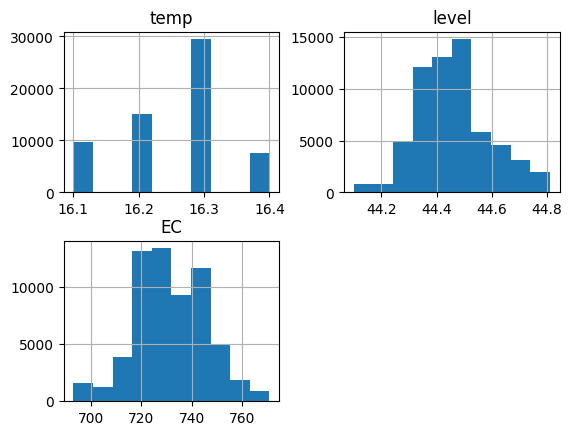

In [ ]:
df.hist( )
plt.show( )


In [ ]:
df1 = df.copy( )
df1.head(3)


,Date,temp,level,EC
0,2009-01-01 00:00:00,16.1,44.47,749
1,2009-01-01 01:00:00,16.1,44.47,749
2,2009-01-01 02:00:00,16.1,44.47,749


In [ ]:
df1['level_z_score'] = (df1['level'] - df1['level'].mean( )) / df1['level'].std( )
df1['EC_z_score'] = (df1['EC'] - df1['EC'].mean()) / df1['EC'].std( )
df1.head(3)


,Date,temp,level,EC,level_z_score,EC_z_score
0,2009-01-01 00:00:00,16.1,44.47,749,0.0803,1.246237
1,2009-01-01 01:00:00,16.1,44.47,749,0.0803,1.246237
2,2009-01-01 02:00:00,16.1,44.47,749,0.0803,1.246237


In [ ]:
df1.describe()

,temp,level,EC,level_z_score,EC_z_score
count,61814.000000,61814.000000,61814.000000,6.181400e+04,6.181400e+04
mean,16.256793,44.459701,731.698612,6.867484e-14,-2.067234e-15
std,0.089692,0.128256,13.882905,1.000000e+00,1.000000e+00
min,16.100000,44.100000,693.000000,-2.804553e+00,-2.787501e+00
25%,16.200000,44.370000,722.000000,-6.993901e-01,-6.986011e-01
50%,16.300000,44.450000,730.000000,-7.563803e-02,-1.223528e-01
75%,16.300000,44.520000,742.000000,4.701450e-01,7.420196e-01
max,16.400000,44.810000,771.000000,2.731246e+00,2.830920e+00


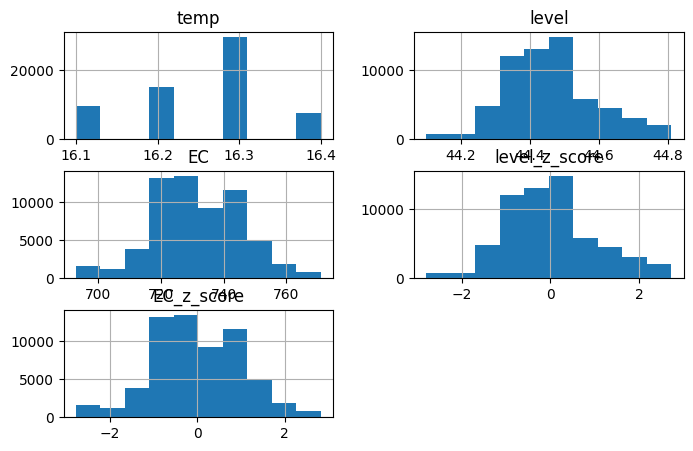

In [ ]:
df1.hist(figsize=(8,5))
plt.show( )


In [ ]:
df3 = df.copy( )

df3['level_minmax'] = (df3['level']-df3['level'].min()) / (df3['level'].max( )\
 			           -df3['level'].min( ))
df3['EC_minmax'] = (df3['EC'] - df3['EC'].min( )) / (df3['EC'].max( ) - df3['EC'].min( ))
df3.head(3)

,Date,temp,level,EC,level_minmax,EC_minmax
0,2009-01-01 00:00:00,16.1,44.47,749,0.521127,0.717949
1,2009-01-01 01:00:00,16.1,44.47,749,0.521127,0.717949
2,2009-01-01 02:00:00,16.1,44.47,749,0.521127,0.717949
